In [1]:
import matplotlib.pyplot as plt

In [2]:
def plot_loss_ppl(filepath):
    train_losses, train_ppls, val_losses, val_ppls = [], [], [], []
    with open(filepath, 'r', encoding='utf-8') as f:
        for line in f:
            line = line.strip()
            if line.startswith('| end of epoch'):
                segments = line.split('|')
                train_losses.append(float(segments[3].split()[-1]))
                train_ppls.append(float(segments[4].split()[-1]))
                val_losses.append(float(segments[5].split()[-1]))
                val_ppls.append(float(segments[6].split()[-1]))
    assert len(train_losses) == len(train_ppls) == len(val_losses) == len(val_ppls)
    
    # plot
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), dpi=160)
    # loss
    axs[0].plot(range(1, len(train_losses) + 1), train_losses, color='xkcd:gold', label='train')
    axs[0].plot(range(1, len(val_losses) + 1), val_losses, color='xkcd:cerulean', label='val')
    axs[0].set_title('loss as training progresses')
    axs[0].set_xlabel('epoch')
    axs[0].set_ylabel('loss')
    axs[0].legend()
    # perplexity
    axs[1].plot(range(1, len(train_ppls) + 1), train_ppls, color='xkcd:gold', label='train')
    axs[1].plot(range(1, len(val_ppls) + 1), val_ppls, color='xkcd:cerulean', label='val')
    axs[1].set_title('perplexity as training progresses')
    axs[1].set_xlabel('epoch')
    axs[1].set_ylabel('perplexity')
    axs[1].legend()
    plt.show()

In [27]:
def get_min_val_ppl(filepath):
    val_ppls = []
    with open(filepath, 'r', encoding='utf-8') as f:
        for line in f:
            line = line.strip()
            if line.startswith('| end of epoch'):
                segments = line.split('|')
                val_ppls.append(float(segments[6].split()[-1]))
    
    return min(val_ppls)

In [28]:
def show_min_val_ppl(filepath):
    # plot
    plt.figure(figsize=(10, 1), dpi=160)
    plt.text(0.35, 0.5, f"minimum val perplexity: {get_min_val_ppl(filepath)}", fontweight='bold')
    plt.axis('off')
    plt.show()

In [29]:
def show_heading(emsize, dropout_prob):
    # plot
    plt.figure(figsize=(10, 1), dpi=160)
    plt.text(0.0, 0.5, f"LSTM Model Embdedding Size {emsize}, Hidden Size {emsize}, Dropout {dropout_prob}",
             fontweight='bold', fontsize=14)
    plt.axis('off')
    plt.show()

In [32]:
def multibar(emsizes, dropout_probs):
    # plot
    plt.figure(figsize=(10, 1), dpi=160)
    # set width of bar
    barWidth = 0.25

    # set height of bar
    bars1 = [12, 30, 1, 8, 22]
    bars2 = [28, 6, 16, 5, 10]
    bars3 = [29, 3, 24, 25, 17]

    # Set position of bar on X axis
    r1 = np.arange(len(bars1))
    r2 = [x + barWidth for x in r1]
    r3 = [x + barWidth for x in r2]

    # Make the plot
    plt.bar(r1, bars1, color='#7f6d5f', width=barWidth, edgecolor='white', label='var1')
    plt.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='var2')
    plt.bar(r3, bars3, color='#2d7f5e', width=barWidth, edgecolor='white', label='var3')

    # Add xticks on the middle of the group bars
    plt.xlabel('group', fontweight='bold')
    plt.xticks([r + barWidth for r in range(len(bars1))], ['A', 'B', 'C', 'D', 'E'])

    # Create legend & Show graphic
    plt.legend()
    plt.show()


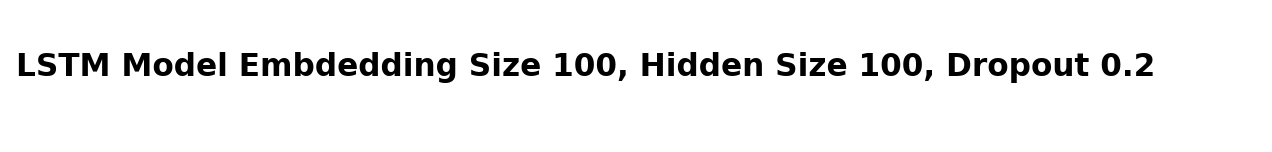

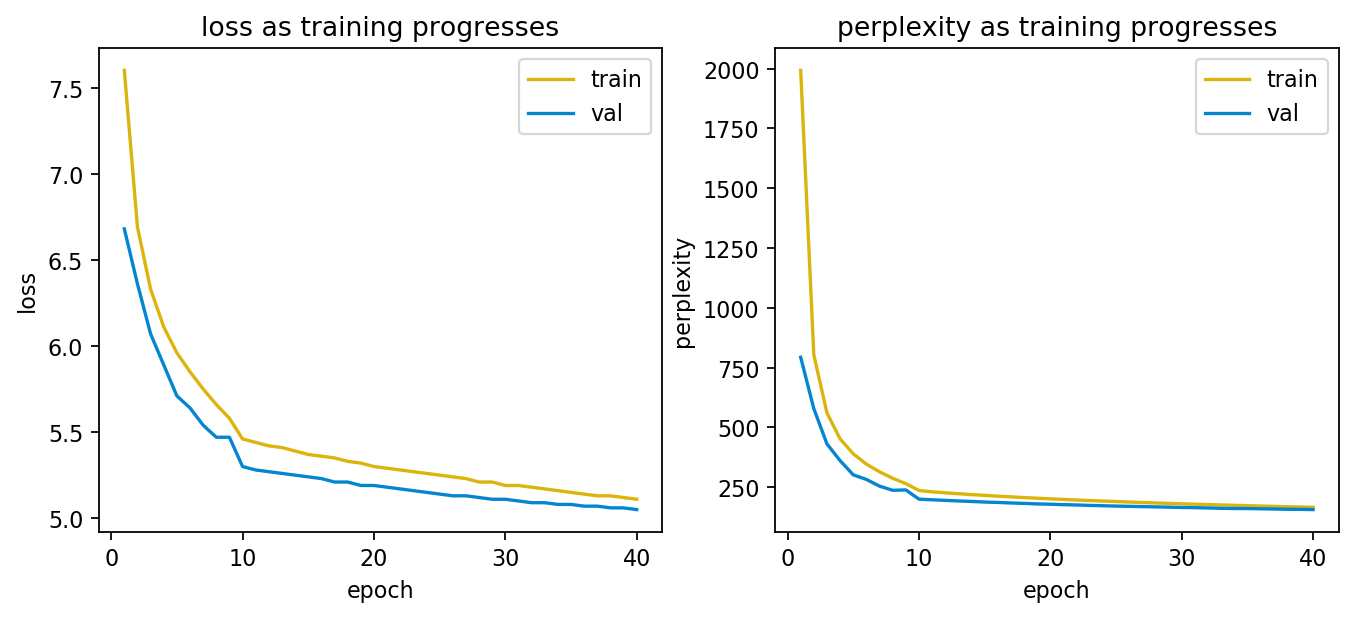

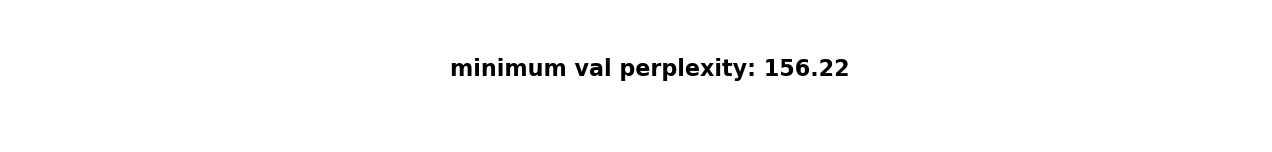

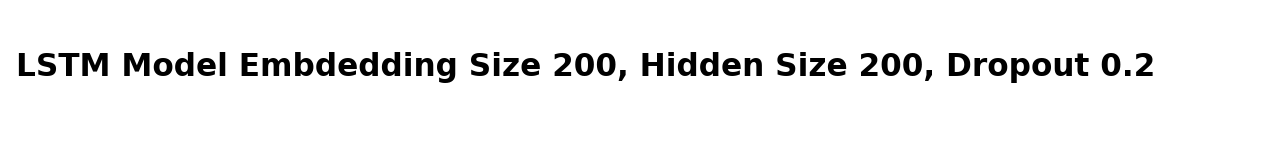

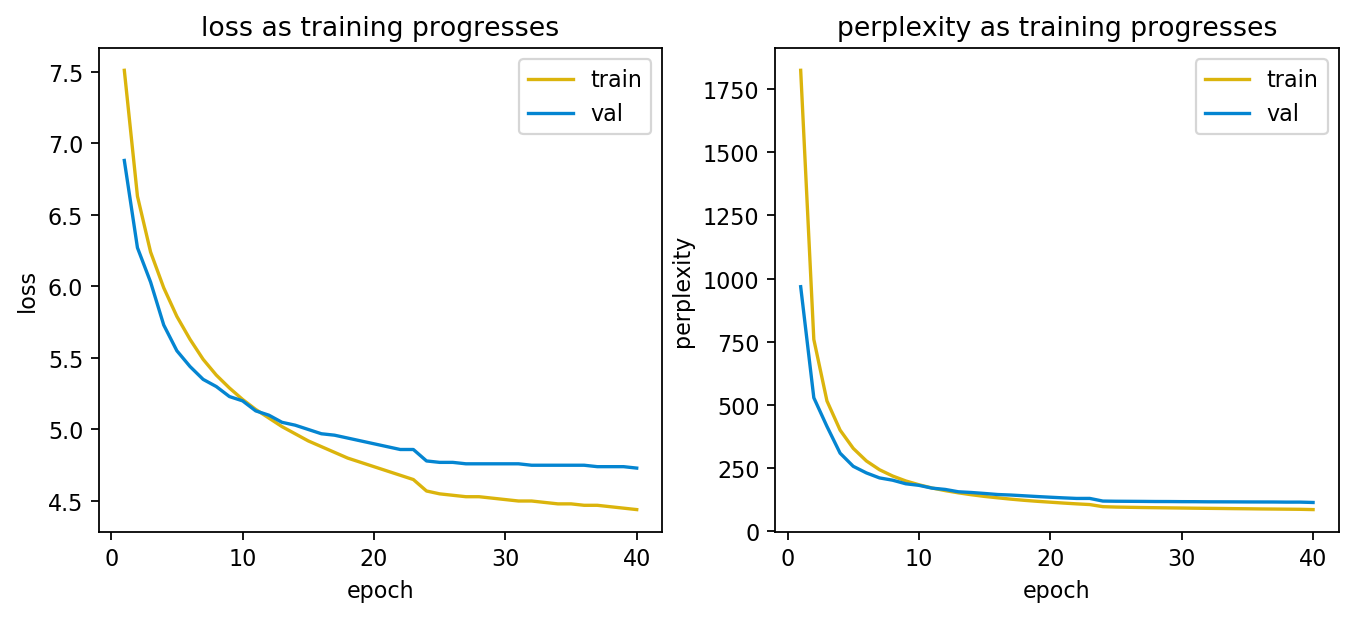

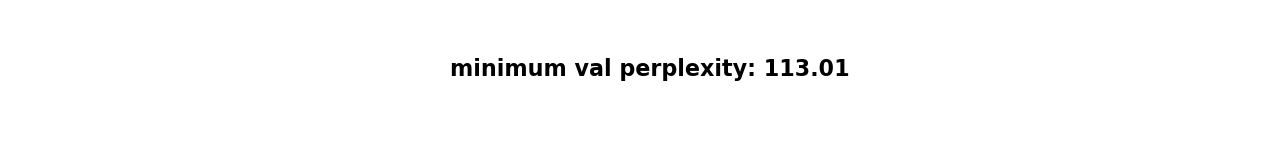

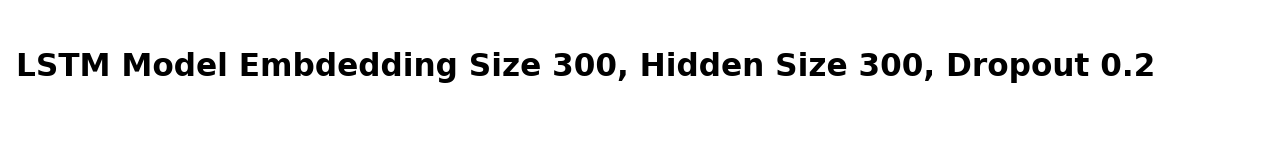

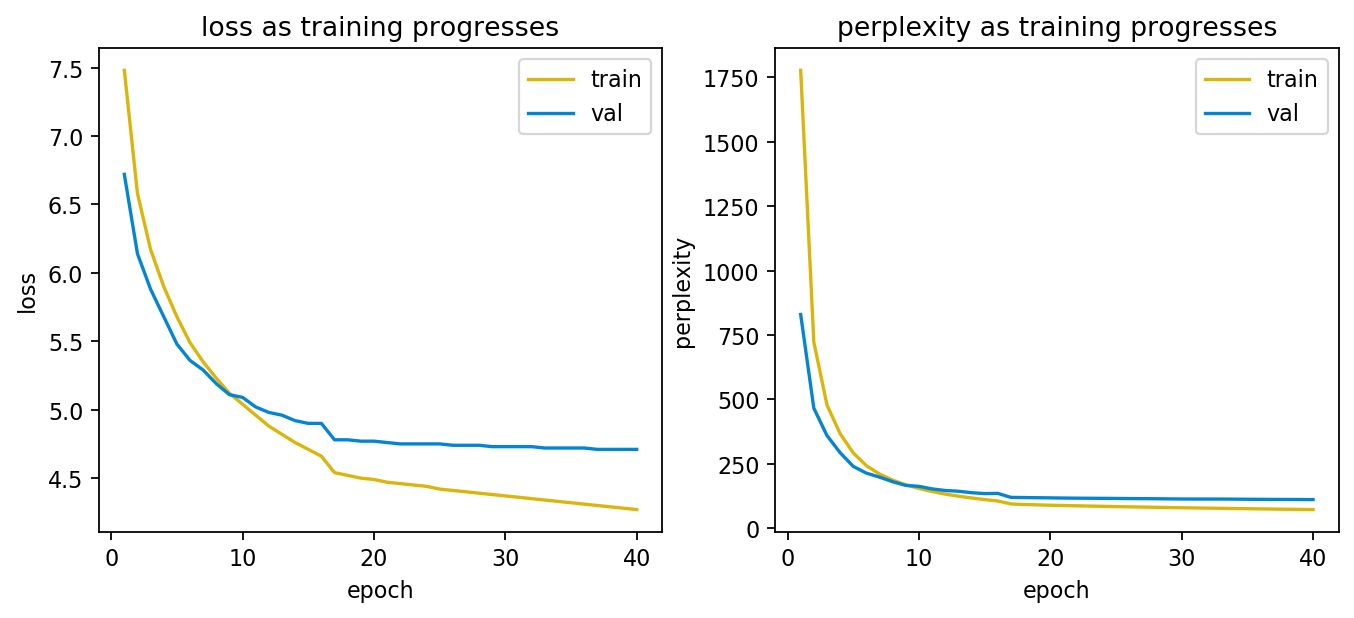

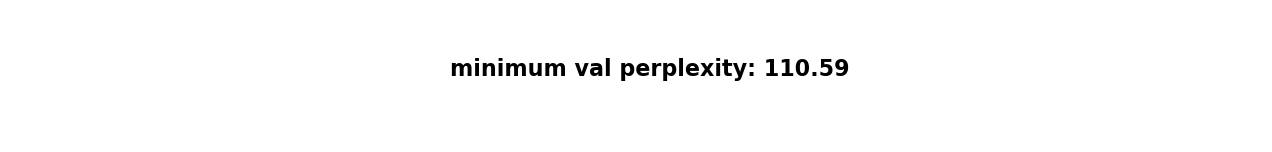

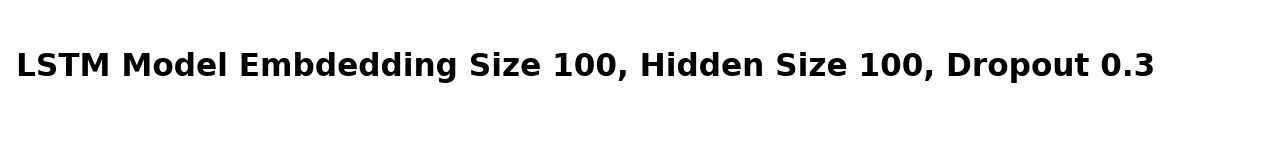

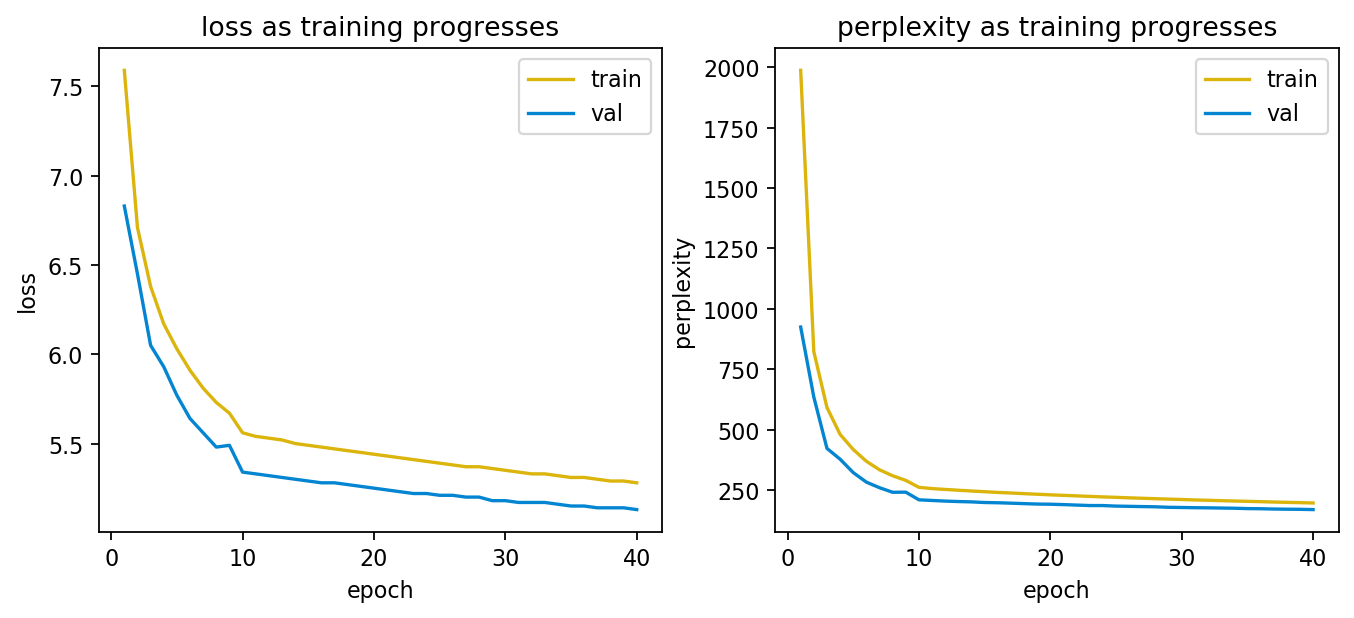

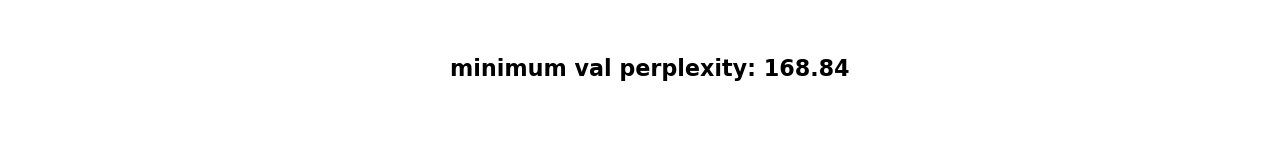

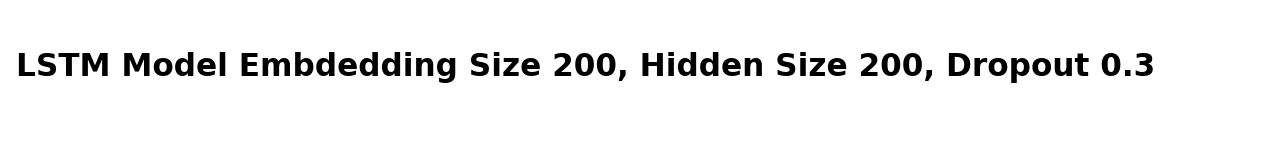

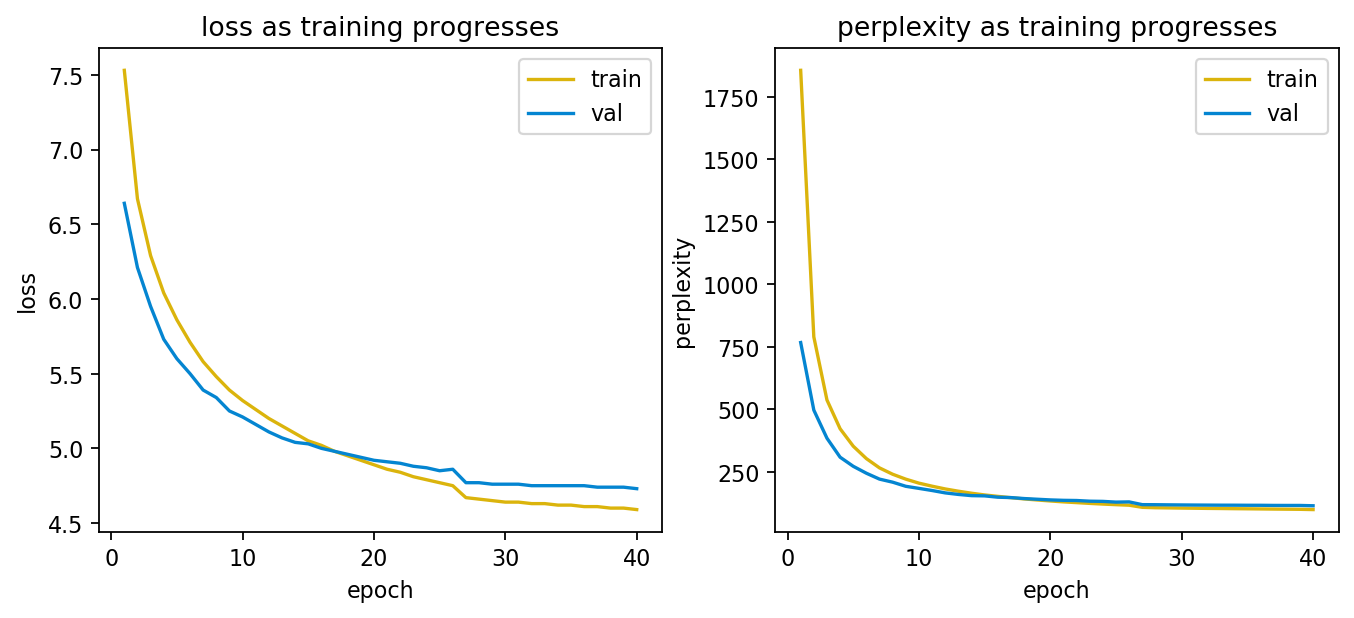

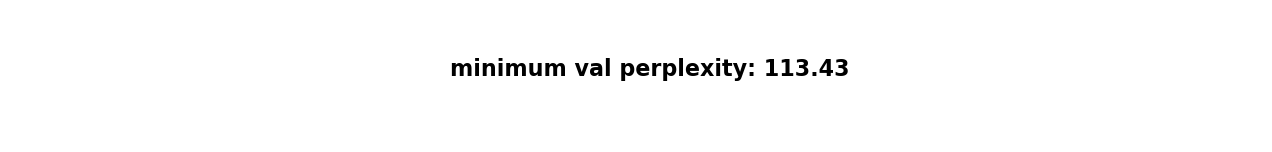

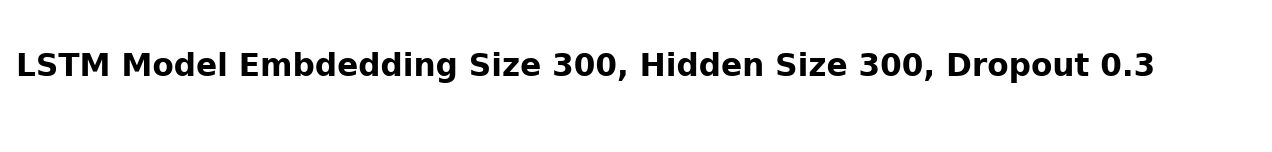

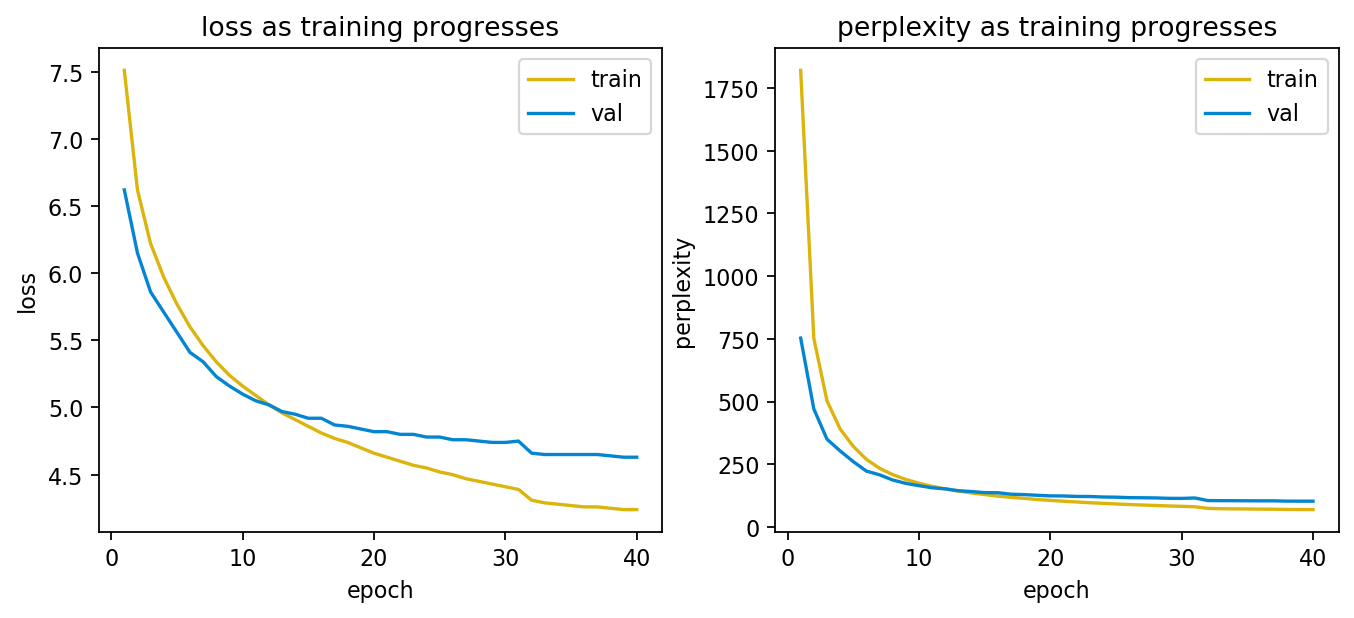

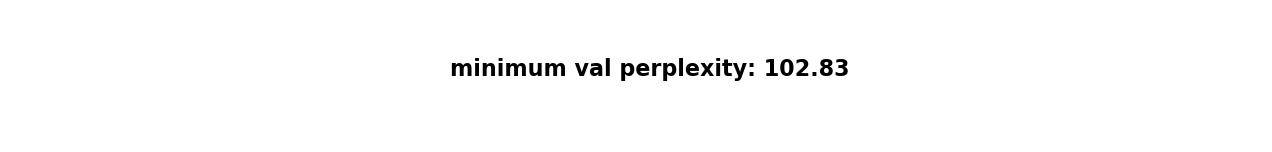

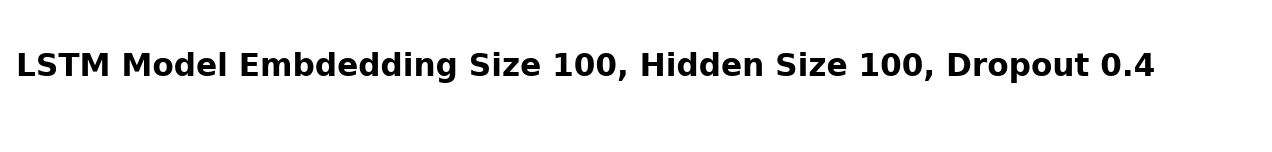

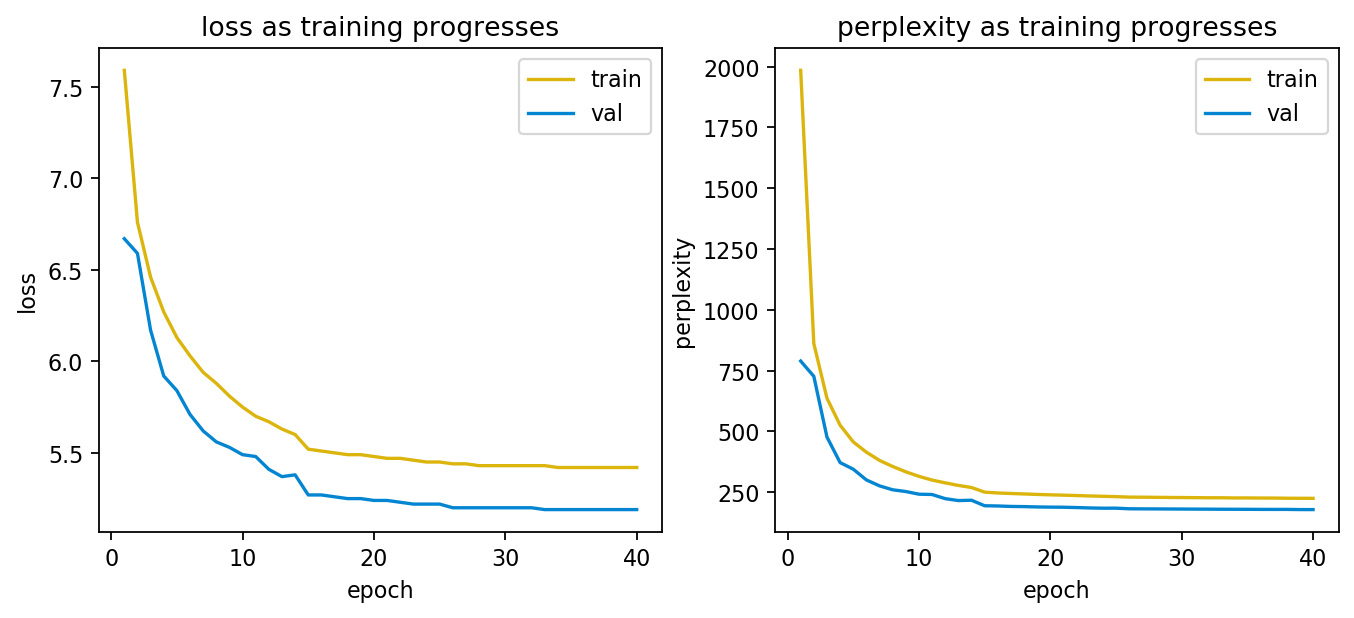

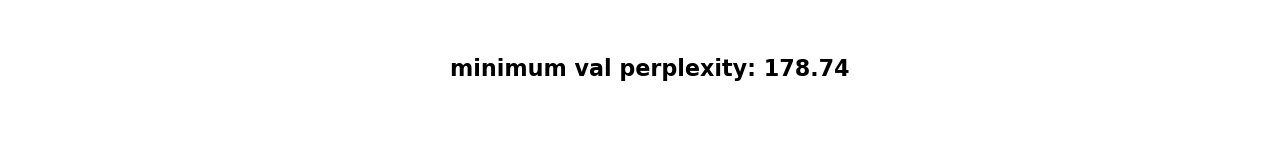

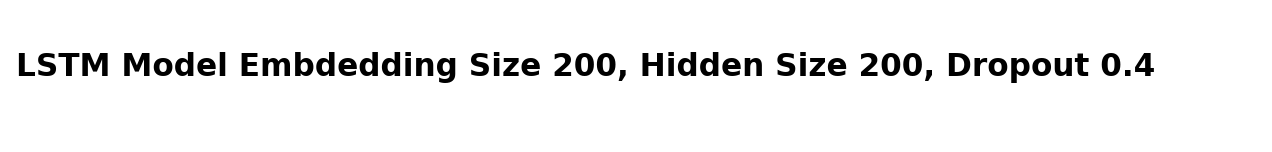

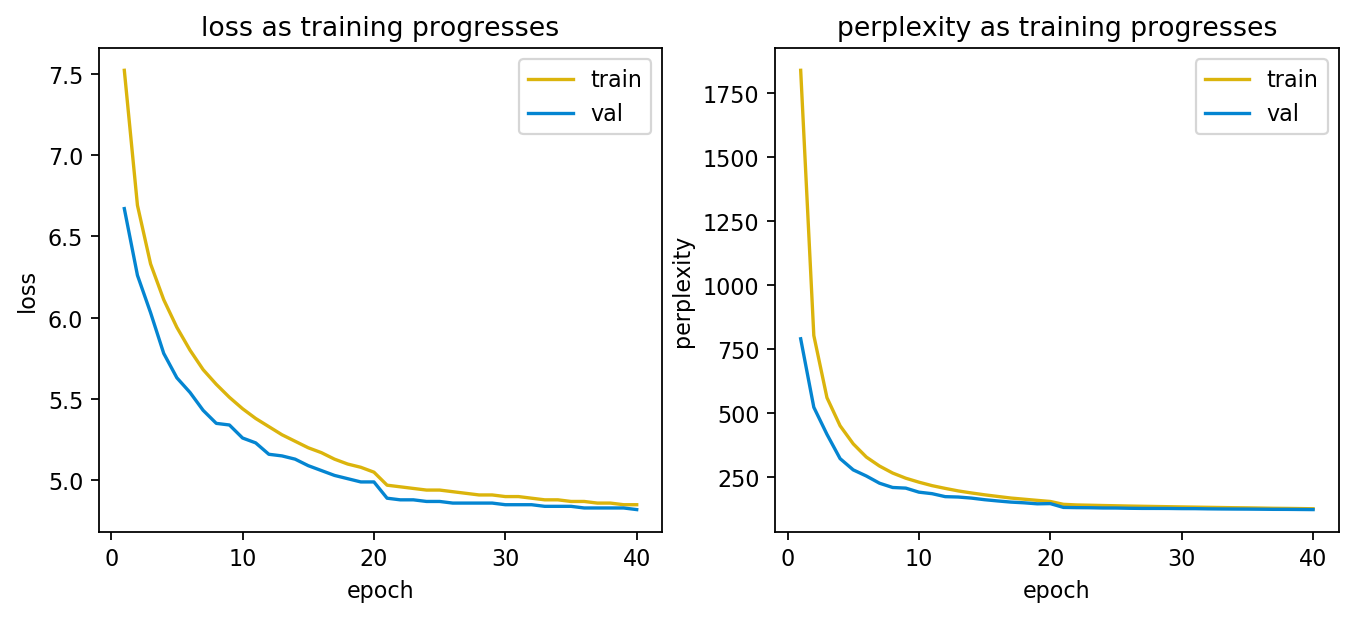

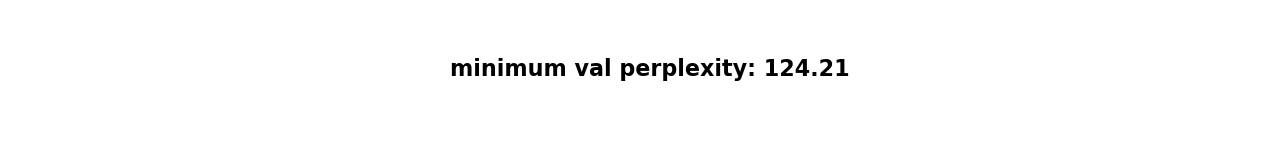

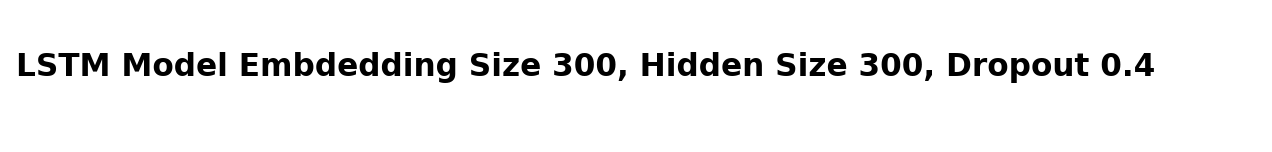

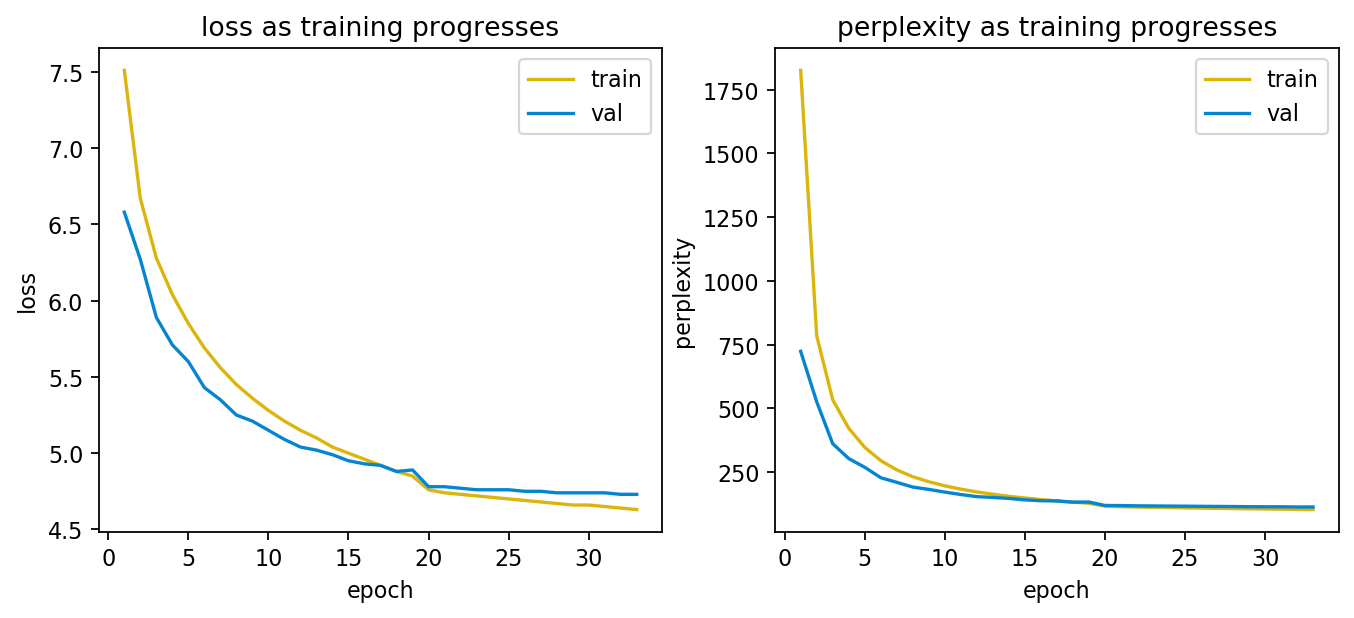

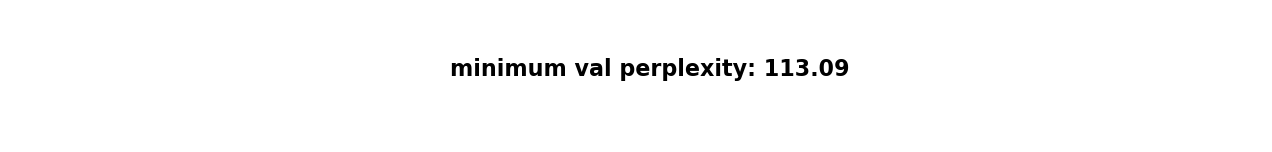

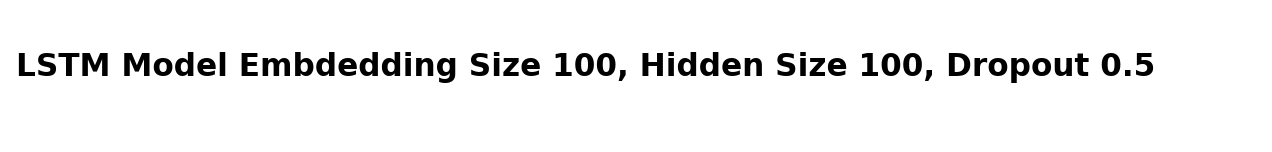

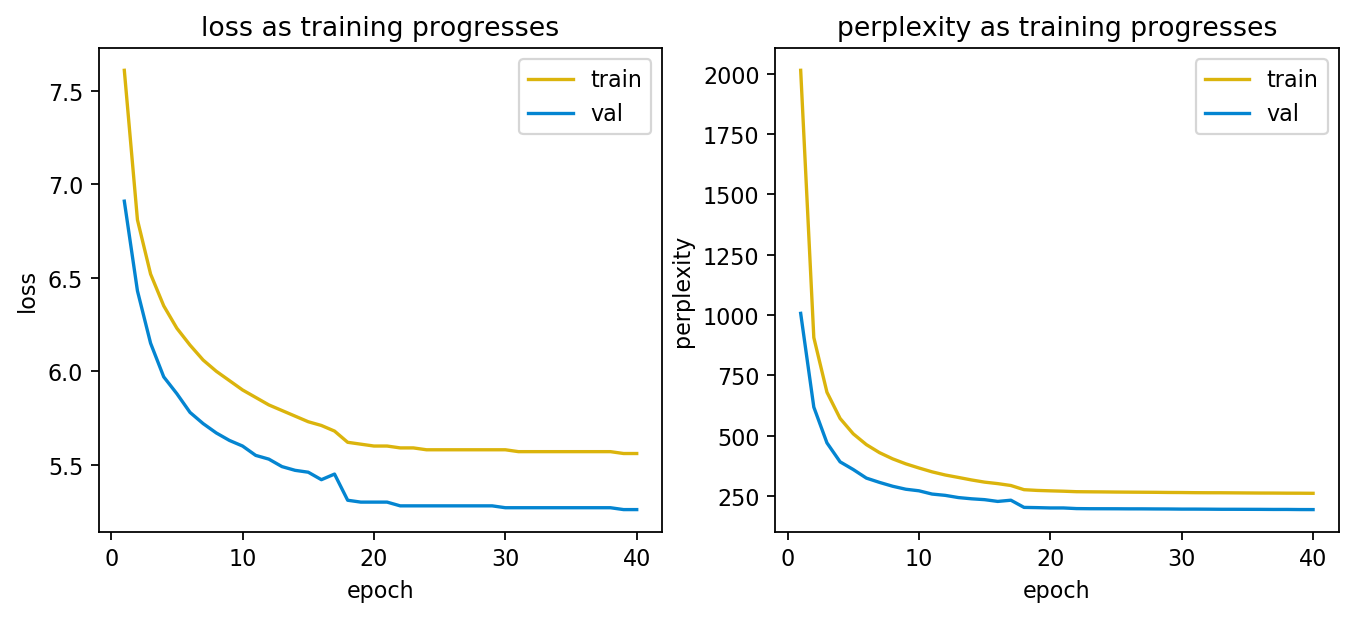

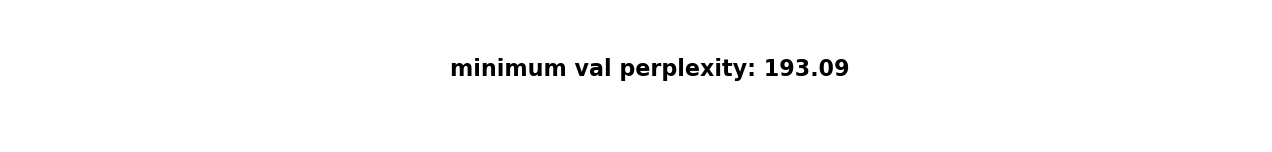

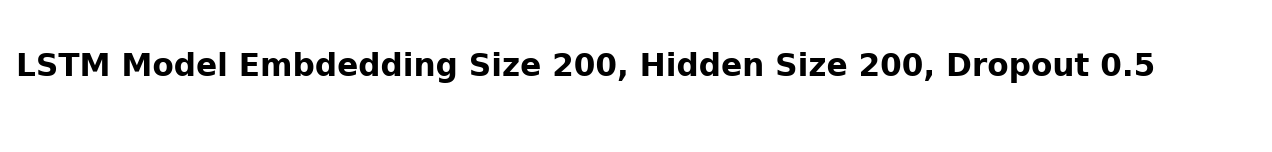

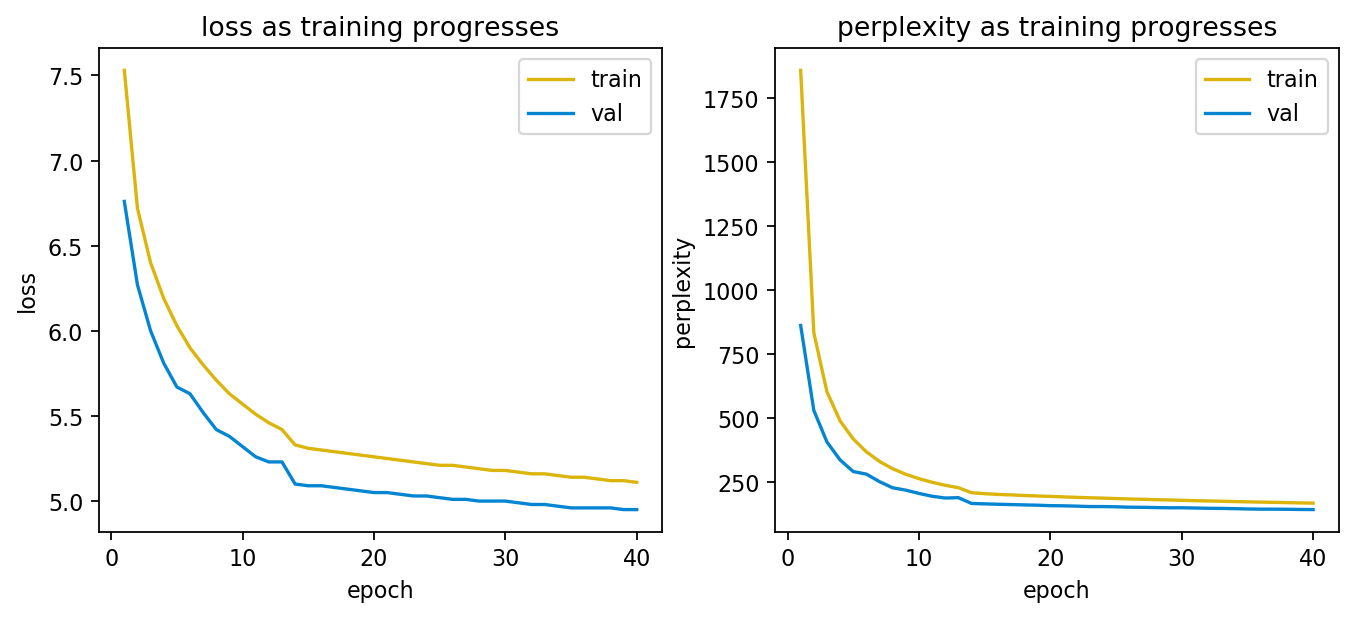

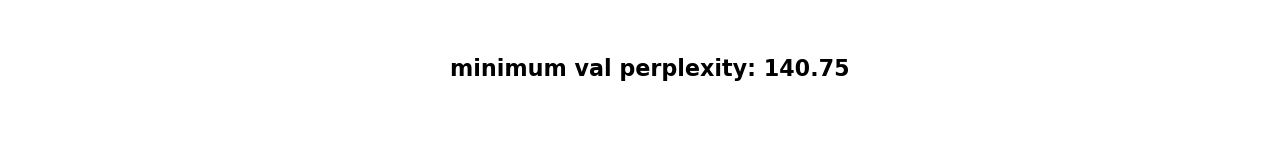

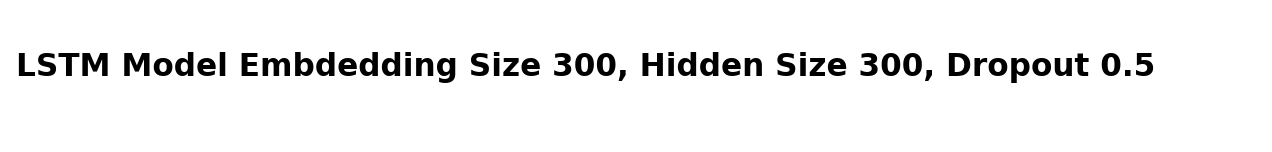

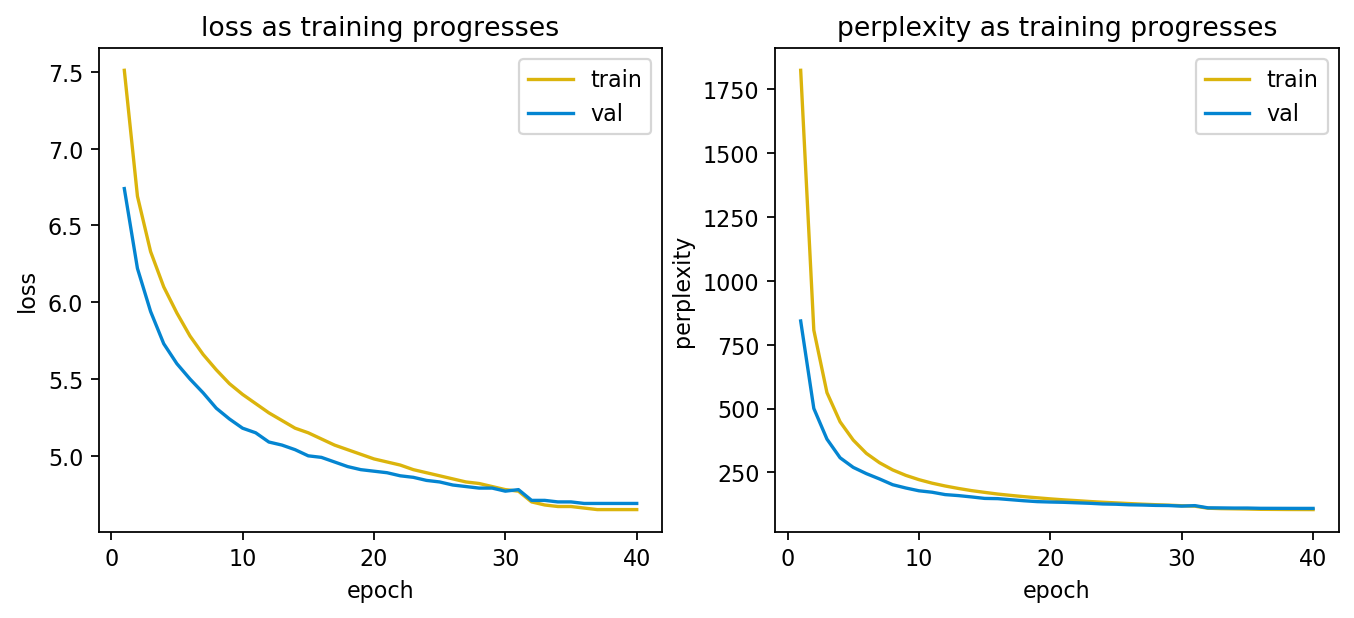

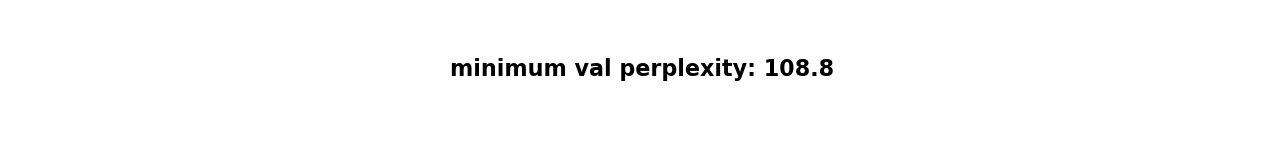

In [31]:
for dropout_prob in [0.2, 0.3, 0.4, 0.5]:
    for emsize in [100, 200, 300]:
        show_heading(emsize, dropout_prob)
        filename = f'logs/lstm_emsize{emsize}_dropout{dropout_prob}_tied.txt'
        plot_loss_ppl(filename)
        show_min_val_ppl(filename)